#**Machine Learning Tutorial 11 - K-Means Clustering with scikit-learn Python Example**

https://youtu.be/KYD6zqWxm8o

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Creating a dummy data

In [ ]:
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,45],
              [85,70],
              [71,80],
              [60,78],
              [55,52],
              [80,91]])

X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 45],
       [85, 70],
       [71, 80],
       [60, 78],
       [55, 52],
       [80, 91]])

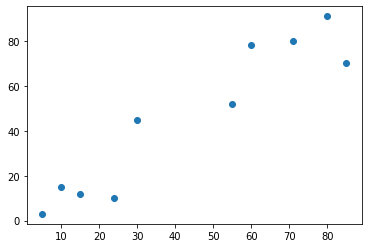

In [ ]:
plt.scatter(X[:,0], X[:,1], label = 'True Position')

In [ ]:
#2 Clusters

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[70.2 74.2]
 [16.8 17. ]]
[1 1 1 1 1 0 0 0 0 0]


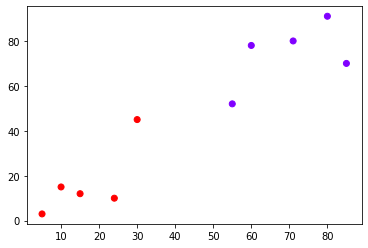

In [ ]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap = 'rainbow')

In [ ]:
#3 Clusters

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

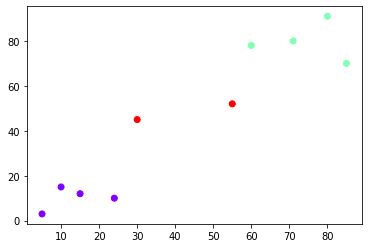

In [ ]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap = 'rainbow')

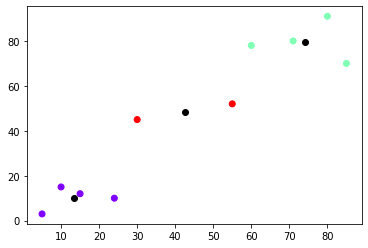

In [ ]:
  #Clusters with centroids

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'black')

#**K-Means Clustering - Methods using Scikit-learn in Python - Tutorial 23 in Jupyter Notebook**

https://youtu.be/ikt0sny_ImY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1_BDNAhoUFhNi5Htr7HJu5y2s2znKSM9B'}) # replace the id with id of file you want to access
downloaded.GetContentFile('mallClusters.csv')

In [ ]:
df = pd.read_csv('mallClusters.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [ ]:
df.describe()

,CustomerID,Age,Income,Spending_Score,Clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.910000
std,57.879185,13.969007,26.264721,25.823522,1.326915
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


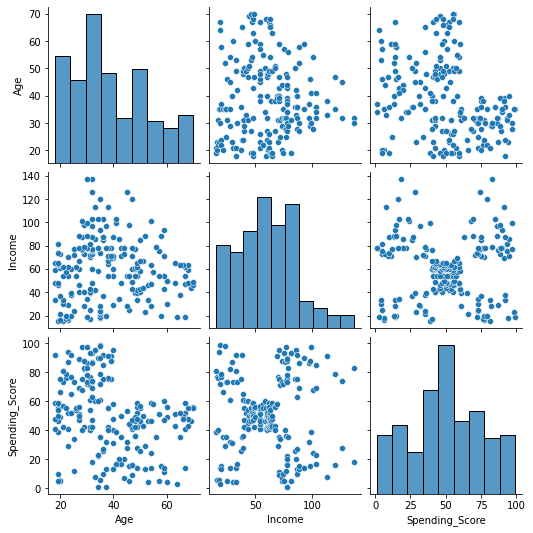

In [ ]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Age','Income', 'Spending_Score']])

We will basically plot the Spending Score(X-Axis) vs Income (Y-Axis). Basically the 6th picture of the pics above. So, We will need 5 clusters (From the looks of the figure).

**Perform K-Mean Clustering with 5 Clusters**

In [ ]:
kmeans = KMeans(n_clusters=5 ,random_state = 42)  #n_clusters = 5 from the figure
X = df[['Spending_Score']]
y = df[['Income']]

kmeans = kmeans.fit(X,y)
kmeans

KMeans(n_clusters=5, random_state=42)

In [ ]:
kmeans.cluster_centers_ #The centers of the 5 clusters

array([[11.84615385],
       [74.25      ],
       [52.79032258],
       [90.7037037 ],
       [37.        ]])


Attach Clusters to the Original Data


In [ ]:
df['Clusters'] = kmeans.labels_ #This tells which sample belongs to which cluster

df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [ ]:
df['Clusters'].value_counts() #Number of customers belongs to a cluster

2    62
4    40
0    39
1    32
3    27
Name: Clusters, dtype: int64

Plot Cluster on Chart

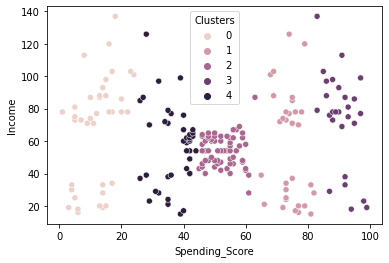

In [ ]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

#**K-Means Clustering Algorithm with Python Tutorial**

https://youtu.be/iNlZ3IU5Ffw

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1RFkdsTPPV9IemjN6GcvzKdpcjP1nKYcv'}) # replace the id with id of file you want to access
downloaded.GetContentFile('force2020_data_unsupervised_learning.csv')

In [3]:
df = pd.read_csv('force2020_data_unsupervised_learning.csv')
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [4]:
df.dropna(inplace = True)
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


In [5]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


Transforming the data

In [6]:
scaler = StandardScaler()

In [7]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [8]:
df[['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']] = scaler.fit_transform(df[['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']])
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...
16435,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449
16436,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891
16437,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910
16438,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690


In [9]:
X = df[['NPHI']]
y = df[['RHOB']]

Identifying optimum number of clusters

In [10]:
def optimise_k_means(data,max_k):
  means = []
  inertias = []

  for k in range(1,max_k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)
  
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()


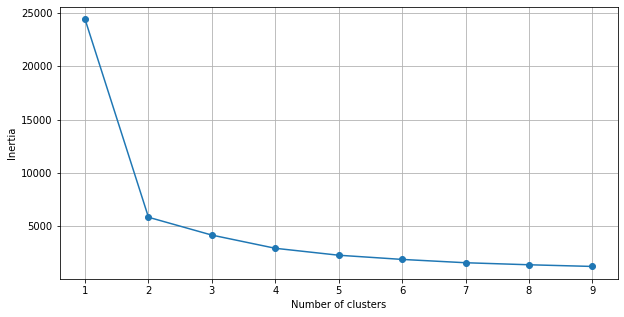

In [11]:
optimise_k_means(df[['RHOB','NPHI']],10)

Looking at the elbow plot, We decide that the optimum number of clusters is 3. (2 is too simplistic)

Applying KMeans

In [12]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X,y)

KMeans(n_clusters=3)

In [13]:
df['kmeans_3'] = kmeans.labels_ #assigning the samples to their clusters
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,kmeans_3
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,0
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,0
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,0
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,0
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...
16435,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,2
16436,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,2
16437,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,2
16438,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,2


Visualizing the data

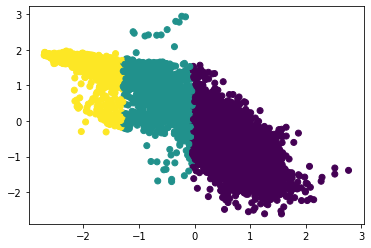

In [ ]:
plt.scatter(x = df['NPHI'], y = df['RHOB'], c = df['kmeans_3'])

plt.show()

Creating multiple clusters fpr comparison

In [14]:
for k in range(1,6):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X,y)
  df[f'KMeans_{k}'] = kmeans.labels_

In [15]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,0,0,0,1,2,3
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,0,0,0,1,2,3
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,0,0,0,1,2,3
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,0,0,0,1,2,3
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,2,0,1,0,1,2
16436,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,2,0,1,0,1,2
16437,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,2,0,0,0,1,2
16438,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,2,0,0,0,1,2


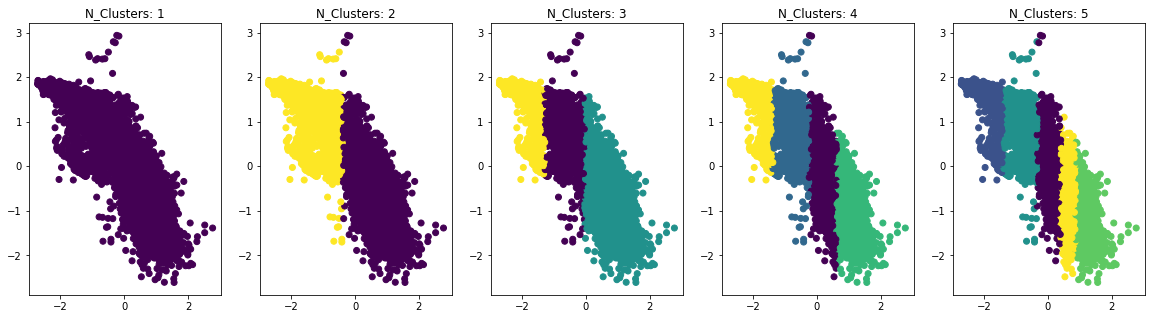

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start = 1):
  ax.scatter(x=X,y=y,c = df[f'KMeans_{i}'])
  ax.set_title(f'N_Clusters: {i}')

#**Machine Learning Tutorial Python - 13: K Means Clustering Algorithm**

https://youtu.be/EItlUEPCIzM

In [19]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1nqPSRCrnuf9xvv5kKemFWAXPOpDsgQJ9'}) # replace the id with id of file you want to access
downloaded.GetContentFile('income.csv')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


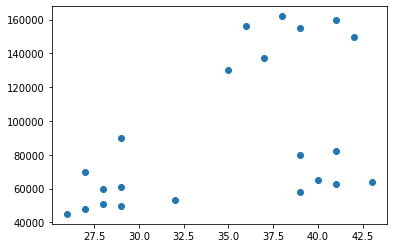

In [23]:
plt.scatter(df['Age'],df['Income($)'])

In [24]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [33]:
km.fit_predict(df[['Age', 'Income($)']])

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [34]:
print(km.labels_)

[2 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]


In [35]:
df['Clusters'] = km.labels_
df

,Name,Age,Income($),Clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


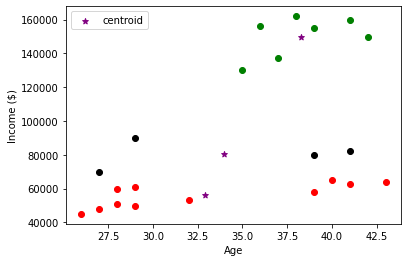

In [37]:
df1 = df[df['Clusters']==0]
df2 = df[df['Clusters']==1]
df3 = df[df['Clusters']==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

From the look of it, The data needs to be scaled

In [38]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

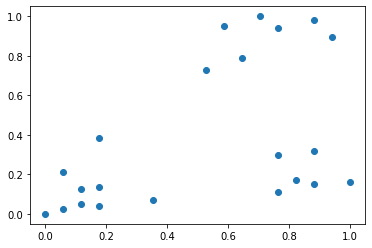

In [39]:
plt.scatter(df.Age,df['Income($)'])

In [40]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [41]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Clusters,cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,1,0
3,Ismail,0.117647,0.128205,1,0
4,Kory,0.941176,0.897436,0,1


In [42]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

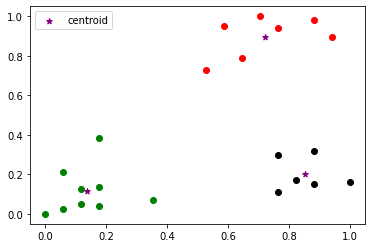

In [43]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**Elbow Plot**

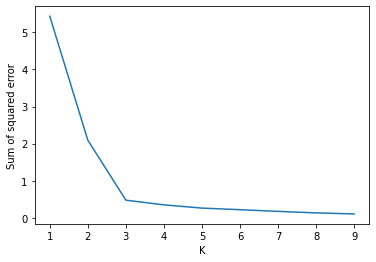

In [44]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)